<a href="https://colab.research.google.com/github/ianotiato/-AI_Tools_Assignment/blob/main/task2_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Shape after reshaping: (60000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.7304 - loss: 0.8330 - val_accuracy: 0.9758 - val_loss: 0.0801
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.9572 - loss: 0.1424 - val_accuracy: 0.9842 - val_loss: 0.0574
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.9717 - loss: 0.0991 - val_accuracy: 0.9833 - val_loss: 0.0547
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.9786 - loss: 0.0726 - val_accuracy: 0.9868 - val_loss: 0.0495
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9824 - loss: 0.0613 - val_accuracy: 0.9879 - val_loss: 0.0405
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9855 - loss: 0.0516 - val_accuracy: 0.9886 - val_loss: 0.0379
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9853 - loss: 0.0483 - val_accuracy: 0.9891 - val_loss: 0.0390
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.9877 - loss: 0

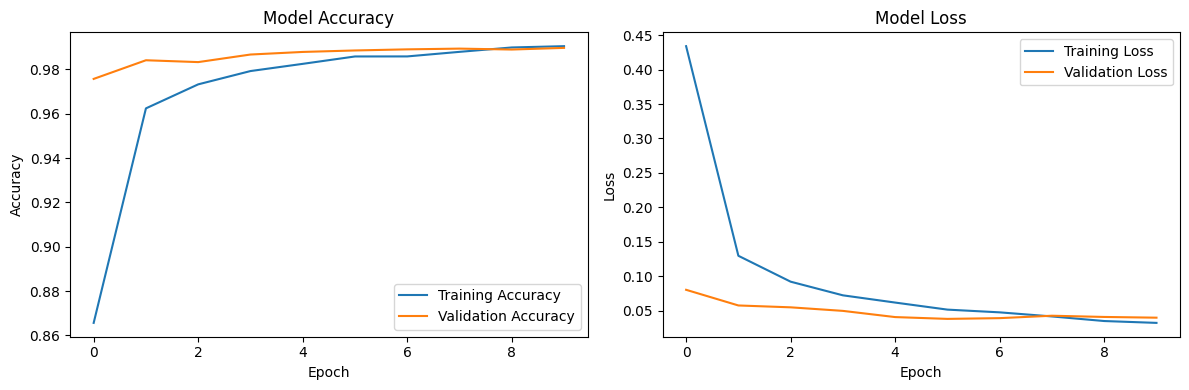

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


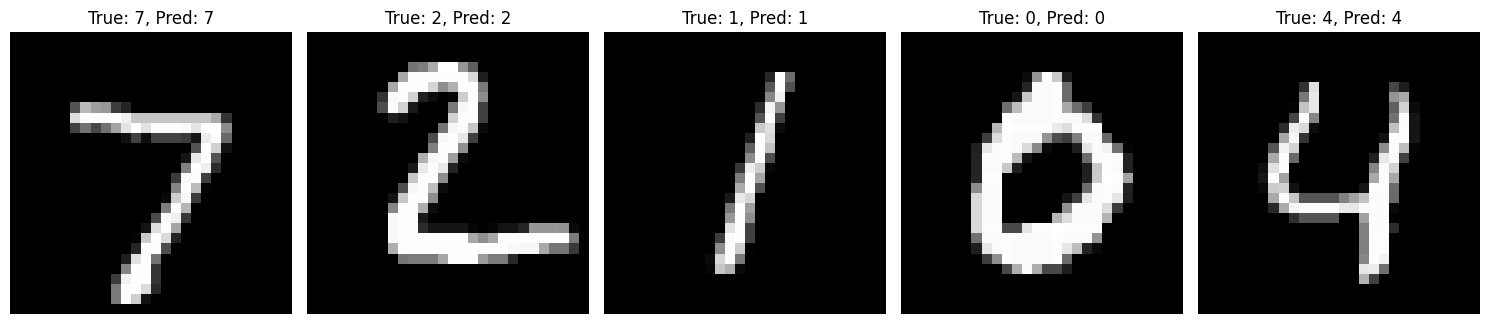

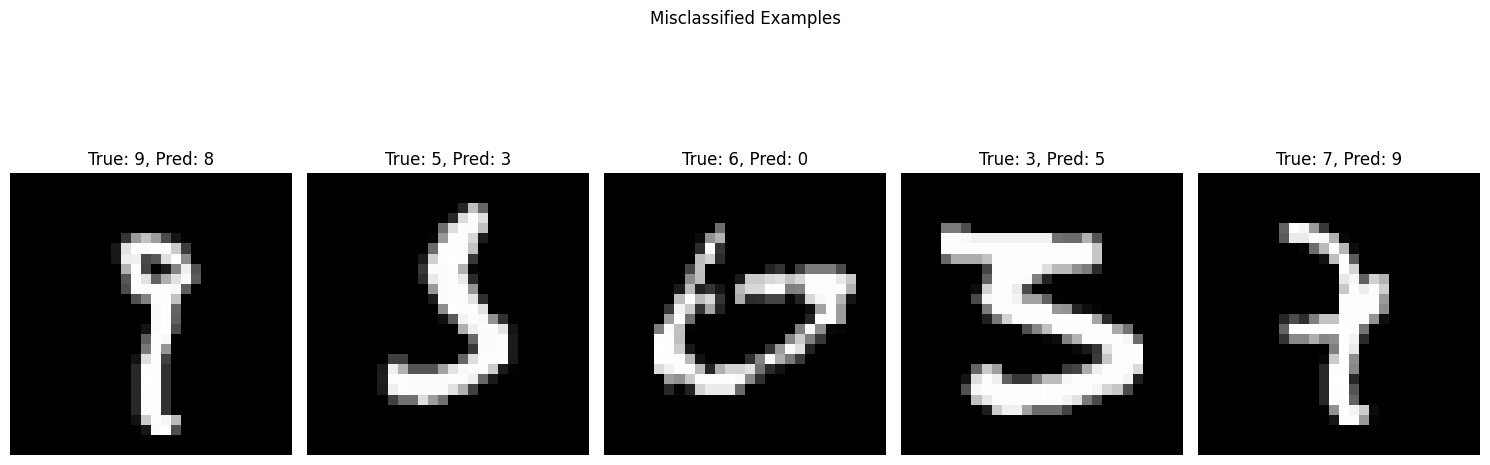

In [1]:
# Task 2: MNIST Classification with CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Preprocess data
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Shape after reshaping: {x_train.shape}")

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize predictions on sample images
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Display 5 sample predictions
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[i]}, Pred: {y_pred_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Display some misclassified examples
misclassified_idx = np.where(y_pred_classes != y_test)[0]
if len(misclassified_idx) > 0:
    plt.figure(figsize=(15, 6))
    for i in range(5):
        if i < len(misclassified_idx):
            idx = misclassified_idx[i]
            plt.subplot(1, 5, i+1)
            plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
            plt.title(f'True: {y_test[idx]}, Pred: {y_pred_classes[idx]}')
            plt.axis('off')
    plt.suptitle('Misclassified Examples')
    plt.tight_layout()
    plt.show()